对图片进行预处理

In [1]:
import data_process
import os
import shutil
import glob

from keras.preprocessing import image
import cv2

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed (0)
%matplotlib inline

Using TensorFlow backend.


第一次直接移动"sample_submission.csv"到"prediction/sample_submission.csv"

In [3]:
if not os.path.exists("prediction/"):
    os.mkdir("prediction/")
if os.path.isfile("sample_submission.csv") and not os.path.isfile("prediction/sample_submission.csv"):
    shutil.move("sample_submission.csv","prediction/sample_submission.csv")

训练数据集，分类，存放在不同的文件夹（cats和dogs文件夹）

In [2]:
data_process.split_image('train','processed_train_data',overload=False)

复制测试数据集到processed_test_data/test文件夹

In [3]:
shutil.copytree('test','processed_test_data/test')

'processed_test_data/test'

数据探索

In [4]:
def showimgs(imgs,titles):
    col = len(imgs)
    for i in range(col):
        plt.subplot(1,col,i+1)
        plt.imshow(imgs[i])
        plt.title(titles[i])
        #plt.axis('off')
    plt.show()

获取所有图片

In [5]:
cats_path = 'processed_train_data/cats'
cats_files = glob.glob(os.path.join(cats_path, "*"))

In [6]:
dogs_path = 'processed_train_data/dogs'
dogs_files = glob.glob(os.path.join(dogs_path, "*"))

In [7]:
test_path = "processed_test_data/test"
test_files = glob.glob(os.path.join(test_path, "*"))

随机导出展示的图片

In [8]:
show_rows = 2
show_cols = 3
show_number = show_rows * show_cols

In [9]:
cats_show = np.array(random.sample(cats_files,show_number)).reshape(show_rows,show_cols)
dogs_show = np.array(random.sample(dogs_files,show_number)).reshape(show_rows,show_cols)
tests_show = np.array(random.sample(test_files,show_number)).reshape(show_rows,show_cols)

展示猫的照片

In [10]:
def file_explore(files):
    """file path-name with shape (row,col)"""
    rows = files.shape[0]
    cols = files.shape[1]
    for i in range(rows):
        imgs = []
        titles = []
        for j in range(cols):
            file = files[i][j]
            title = os.path.split(file)[1]
            img = cv2.imread(file)
            imgs.append(img)
            titles.append(title)
        showimgs(imgs,titles)       

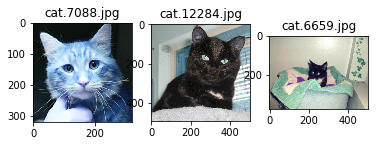

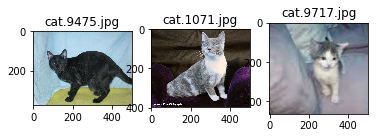

In [11]:
file_explore(cats_show)

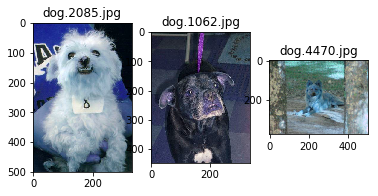

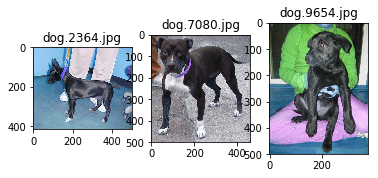

In [12]:
file_explore(dogs_show)

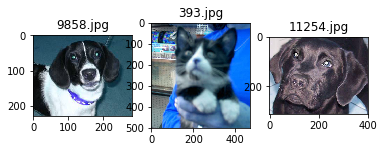

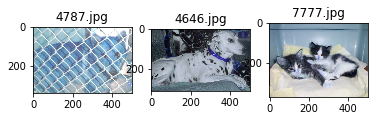

In [13]:
file_explore(tests_show)